# _Data Science from Scratch_ 2e
[ [g](https://github.com/joelgrus/data-science-from-scratch) ] Grus, Joel. (2019). _Data Science from Scratch_. 2e. O'Reilly.
```{contents}
```

---
---
---

## Programming Environment

In [1]:
from   collections import Counter, defaultdict
import math
from   typing      import Callable, List, Tuple

Vector = List[float]
Matrix = List[Vector] # List[List[float]]

import matplotlib.pyplot as plt

---
---
---

## [01] Introduction

---

In [2]:
users = [
  { "id" : 0, "name" : "Hero"  },
  { "id" : 1, "name" : "Dunn"  },
  { "id" : 2, "name" : "Sue"   },
  { "id" : 3, "name" : "Chi"   },
  { "id" : 4, "name" : "Thor"  },
  { "id" : 5, "name" : "Clive" },
  { "id" : 6, "name" : "Hicks" },
  { "id" : 7, "name" : "Devin" },
  { "id" : 8, "name" : "Kate"  },
  { "id" : 9, "name" : "Klein" },
]

In [3]:
friendship_pairs = [
  (0, 1),
  (0, 2),
  (1, 2),
  (1, 3),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (5, 7),
  (6, 8),
  (7, 8),
  (8, 9),
]

In [4]:
# initialize the dict with an empty list for each user id
friendships = {user['id'] : [] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [5]:
# loop over the friendship pairs to populate the list
for i, j in friendship_pairs:
  friendships[i].append(j) # add j as a friend of user i
  friendships[j].append(i) # add i as a friend of user j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [6]:
# What's the average number of connections?

def number_of_friends (user):
  """How many friends does user have?"""
  user_id    = user['id']
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user)
                        for user in users)
print(f"{'Total connections':<20} : {total_connections}")

num_users       = len(users)
avg_connections = total_connections / num_users
print(f"{'Average connections':<20} : {avg_connections}")

Total connections    : 24
Average connections  : 2.4


In [7]:
# Who are the most connected users?

# (user_id, number_of_friends)
num_friends_by_id = [(user['id'], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(
  key    =lambda id_and_friends: id_and_friends[1],
  reverse=True)

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [8]:
def foaf_ids_bad (user):
  """foaf is short for "friend of a friend" """
  return [foaf_id
          for friend_id in friendships[user['id']]
          for foaf_id   in friendships[friend_id]]

foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [9]:
def friends_of_friends (user):
  user_id = user['id']
  return Counter(
    foaf_id
    for friend_id   in friendships[user_id]   # for each of my friends
    for foaf_id     in friendships[friend_id] # find their friends
    if  foaf_id != user_id                    # who aren't me
    and foaf_id not in friendships[user_id]   # and aren't my friends
  )

friends_of_friends(users[0])

Counter({3: 2})

In [10]:
interests = [
  (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
  (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
  (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
  (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
  (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
  (3, "statistics"), (3, "regression"), (3, "probability"),
  (4, "machine learning"), (4, "regression"), (4, "decision trees"),
  (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
  (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
  (6, "probability"), (6, "mathematics"), (6, "theory"),
  (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
  (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
  (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
  (9, "Java"), (9, "MapReduce"), (9, "Big Data"),
]

In [11]:
def data_scientists_who_like (target_interest):
  """Find the ids of all users who like the target interest."""
  return [user_id
          for user_id, user_interest in interests
          if user_interest == target_interest]

In [12]:
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [13]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [14]:
# Who has the most interests in common with a given user?
def most_common_interests_with (user):
  return Counter(
    interested_user_id
    for interest in interests_by_user_id[user['id']]         # for each interest
    for interested_user_id in user_ids_by_interest[interest] # iterate over the other users with that interest
    if  interested_user_id != user['id']                     # who aren't me
  )

In [15]:
salaries_and_tenures = [
  (83000,  8.7),
  (88000,  8.1),
  (48000,  0.7),
  (76000,  6.0),
  (69000,  6.5),
  (76000,  7.5),
  (60000,  2.5),
  (83000, 10.0),
  (48000,  1.9),
  (63000,  4.2),
]

In [16]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
  tenure : sum(salaries) / len(salaries)
  for tenure, salaries in salary_by_tenure.items()
}
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6.0: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10.0: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [17]:
def tenure_bucket (tenure):
  if tenure < 2:
    return 'less than two'
  elif tenure < 5:
    return 'between two and five'
  else:
    return 'more than five'
  
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [18]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [19]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


---
---
---

## [04] Linear algebra

---

In [ ]:
def vector_add (v : Vector,
                w : Vector) -> Vector:
  """Add vector a to vector b."""
  assert len(v) == len(w), "Vectors must be the same length."
  return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_subt (v : Vector,
                 w : Vector) -> Vector:
  """Subtract vector a from vector b."""
  assert len(v) == len(w), "Vectors must be the same length."
  return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum (vectors : List[Vector]) -> Vector:
  """Vector summation.
  Compute the element-wise sum.
  """
  assert vectors, "No vectors were provided."
  num_elems = len(vectors[0])
  assert all(len(v) == num_elems for v in vectors), "At least one vector is of unequal length."
  return [sum(vector[i] for vector in vectors)
          for i in range(num_elems)]

def scalar_mult (c : float,
                 v : Vector) -> Vector:
  """Multiplication of a vector by a scalar."""
  return [c * v_i for v_i in v]

def vector_mean (vectors : List[Vector]) -> Vector:
  """Vector mean.
  Compute the element-wise mean.
  """
  n = len(vectors)
  return scalar_mult(1/n, vector_sum(vectors))

def dot (v : Vector,
         w : Vector) -> float:
  """Vector dot product."""
  assert len(v) == len(w), "Vectors must be the same length."
  return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares (v : Vector) -> float:
  """Compute v_1 * v_1 + ... + v_n * v_n."""
  return dot(v, v)

def magnitude (v : Vector) -> float:
  """Compute the magnitude of vector v."""
  return math.sqrt(sum_of_squares(v))

def distance_squared (v : Vector,
                      w : Vector) -> float:
  """Distance squared between two vectors.
  (v_1 - w_1)**2 + ... + (v_n - w_n)**2 
  """
  return sum_of_squares(vector_subt(v, w))

def distance (v : Vector,
              w : Vector) -> float:
  """Distance between two vectors."""
  #return math.sqrt(distance_squared(v, w))
  return magnitude(vector_subt(v, w))

def shape (A : Matrix) -> Tuple[int, int]:
  """(# rows, # cols)"""
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0
  return num_rows, num_cols

def get_row (A : Matrix,
             i : int) -> Vector:
  """Get the i-th row of matrix A as a Vector.
  If a matrix has n rows and k columns it is called an n x k matrix
  where each row is a vector of length k and each column is a vector of lenght n.
  """
  return A[i]

def get_col (A : Matrix,
             j : int) -> Vector:
  """Get the j-th column of matrix A as a Vector.
  If a matrix has n rows and k columns it is called an n x k matrix
  where each row is a vector of length k and each column is a vector of lenght n."""
  return [A_i[j]        # jth element of row A_i
          for A_i in A] # for each row A_i

def make_matrix (num_rows : int,
                 num_cols : int,
                 entry_fn : Callable[[int, int], float]) -> Matrix:
  """Generate a num_rows x num_cols matrix whose (i,j)-th entry is entry_fn(i, j)."""
  return [[entry_fn(i, j)            # given i, create a list     ???
           for j in range(num_cols)] # [entru_fn(i, 0), ...]      ???
           for i in range(num_rows)] # create one list for each   ???

def identity_matrix (n : int) -> Matrix:
  """n x n identity matrix"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)


assert vector_add( [1, 2, 3], [4, 5, 6]) == [5, 7, 9]
assert vector_subt([5, 7, 9], [4, 5, 6]) == [1, 2, 3]
assert vector_sum( [[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]
assert scalar_mult(2, [1, 2, 3]) == [2, 4, 6]
assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]
assert dot([1, 2, 3], [4, 5, 6]) == 32
assert sum_of_squares([1, 2, 3]) == 14
assert magnitude([3, 4]) == 5
assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)
assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

In [21]:
#            user 0  1  2  3  4  5  6  7  8  9
#
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

friends_of_five = [i
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]
friends_of_five

[4, 6, 7]

---
---
---

## [05] Statistics

---

In [22]:
num_friends   = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)
friend_counts

Counter({100: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

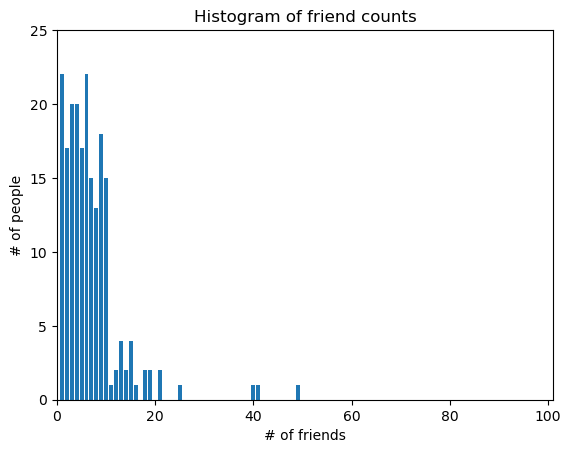

In [23]:
xs = range(max(num_friends))
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys);
plt.axis([0, 101, 0, 25]);
plt.title('Histogram of friend counts');
plt.xlabel('# of friends');
plt.ylabel('# of people');

In [24]:
def mean (xs : List[float]) -> float:
  return sum(xs) / len(xs)

print(f"{'mean':<20}: {mean(num_friends)}")

def _median_odd (xs : List[float]) -> float:
  """If len(xs) is odd, the median is the middle element."""
  return sorted(xs)[len(xs) // 2]

def _median_even (xs : List[float]) -> float:
  """If len(xs) is even, it's the average of the middle two elements."""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

# MEDIAN
#   represents the value under which 50% of the data lies
def median (v : List[float]) -> float:
  """Finds the 'middle-most' value of v."""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

print(f"{'median':<20}: {median(num_friends)}")

# QUANTILE
#   represents the value under which a certain percentile of the data lies
def quantile (xs : List[float],
              p  : float) -> float:
  """Returns the p-th percentile value in x."""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

print()
print(f"{'10th percentile':<20}: {quantile(num_friends, 0.10)}")
print(f"{'25th percentile':<20}: {quantile(num_friends, 0.25)}")
print(f"{'75th percentile':<20}: {quantile(num_friends, 0.75)}")
print(f"{'90th percentile':<20}: {quantile(num_friends, 0.90)}")

def mode (x : List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode."""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items()
          if count == max_count]

print()
print(f"{'mode':<20}: {set(mode(num_friends))}")

# DISPERSION
#   dispersion refers to measures of how spread out our data is
#   values near zero signify not spread out at all
#   large values signify very spread out

# RANGE
#   the difference between the largest and smallest elements
def data_range (xs : List[float]) -> float:
  return max(xs) - min(xs)

print(f"{'range':<20}: {data_range(num_friends)}")

def de_mean (xs : List[float]) -> List[float]:
  """Translate xs by subtracting its mean (so the result has mean 0)."""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance (xs : List[float]) -> float:
  """Almost the average squared deviation from the mean."""
  assert len(xs) >= 2, 'variance requires at least two elements'
  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

print(f"{'variance':<20}: {variance(num_friends)}")

def standard_deviation (xs : List[float]) -> float:
  """The standard deviation is the square root of the variance."""
  return math.sqrt(variance(xs))

print(f"{'standard deviation':<20}: {standard_deviation(num_friends)}")

def interquartile_range (xs : List[float]) -> float:
  """Returns the difference between the 75%-ile and the 25%-ile."""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

print(f"{'interquartile range':<20}: {interquartile_range(num_friends)}")

def covariance (xs : List[float],
                ys : List[float]) -> float:
  assert len(xs) == len(ys), 'xs and ys must have same number of elements'
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours   = [dm / 60 for dm in daily_minutes]

print()
print(f"{'covariance':<20}: {covariance(num_friends, daily_minutes)}")
print(f"{'covariance':<20}: {covariance(num_friends, daily_hours)}")

def correlation (xs : List[float],
                 ys : List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means."""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0

print()
print(f"{'correlation':<20}: {correlation(num_friends, daily_minutes)}")
print(f"{'correlation':<20}: {correlation(num_friends, daily_hours)}")

outlier = num_friends.index(100)

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

print(f"{'correlation':<20}: {correlation(num_friends_good, daily_minutes_good)}")
print(f"{'correlation':<20}: {correlation(num_friends_good, daily_hours_good)}")

mean                : 7.333333333333333
median              : 6.0

10th percentile     : 1
25th percentile     : 3
75th percentile     : 9
90th percentile     : 13

mode                : {1, 6}
range               : 99
variance            : 81.54351395730716
standard deviation  : 9.03014473623248
interquartile range : 6

covariance          : 22.425435139573064
covariance          : 0.37375725232621776

correlation         : 0.24736957366478218
correlation         : 0.24736957366478196
correlation         : 0.5736792115665573
correlation         : 0.5736792115665579


---
---
---

## [18] Neural Networks

---

In [30]:
def step_function (x : float) -> float:
  return 1.0 if x >= 0 else 0.0

def perceptron_output (weights : Vector,
                       bias    : float,
                       x       : Vector) -> float:
  """
  Parameters
  ==========
  weights [Vector]
  bias    [float]
  x       [Vector]

  Return
  ======
  1 if the perceptron fires else 0
  """
  calculation = dot(weights, x) + bias
  return step_function(calculation)

# AND GATE
and_weights = [2, 2]
and_bias    = -3
assert perceptron_output(and_weights, and_bias, [1, 1]) == 1
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

# OR GATE
or_weights = [2, 2]
or_bias    = -1
assert perceptron_output(or_weights, or_bias, [1, 1]) == 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

# NOT GATE
not_weights = [-2]
not_bias    = 1
assert perceptron_output(not_weights, not_bias, [0]) == 1
assert perceptron_output(not_weights, not_bias, [1]) == 0

# we don't really need NNs to construct logic gates
and_gate = min
or_gate  = max
xor_gate = lambda x, y: 0 if x == y else 1

---
---
---

## Acknowledgments

[ [g](https://github.com/joelgrus/data-science-from-scratch) ] Grus, Joel. (2019). _Data Science from Scratch_. 2e. O'Reilly.

---
---
---